# Tutorial - 5


### Submitted by:
#### Indrashis Paul - 19MIM10046

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

## KMeans Clustering

### Importing Modules

### Data

Generate the synthetic data and labels

In [3]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [4]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [5]:
true_labels[:5]

array([1, 0, 2, 2, 2])

### Feature Engineering

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

### KMeans Clustering

In [16]:
# Defining the KMeans Class arguments

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [17]:
# Fit the model using Elbow Method

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

### Evaluation

In [18]:
# The lowest SSE value
kmeans.inertia_

27.896572369402644

In [19]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.91140338, -0.80385132],
       [-0.88514791, -1.3922449 ],
       [-0.09378544,  0.64701791],
       [ 1.57758493,  0.35205315],
       [ 0.74539276,  0.1099734 ],
       [-1.55773017, -1.22760528],
       [-0.637135  ,  1.14580832],
       [-0.29474434, -1.3358114 ],
       [ 0.34737054,  1.41823907],
       [ 1.54678528, -0.38420511]])

In [20]:
# The number of iterations required to converge
kmeans.n_iter_

12

In [21]:
# Checking the labels assigned to 1st 5 points

kmeans.labels_[:5]

array([3, 6, 1, 5, 0], dtype=int32)

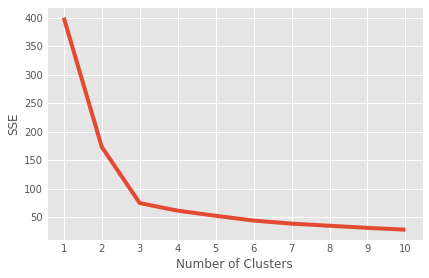

In [23]:
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [24]:
# Choosing optimal number of clusters using Knee Locator

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

## Agglomerative Clustering

In [8]:
data = pd.read_csv("./data/Mall_Customers.csv")
print(data.shape)
data.head()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# Extracting two features
data = data.iloc[:, [3, 4]].values
data[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

### Determining the optimal number of clusters with dendrogram

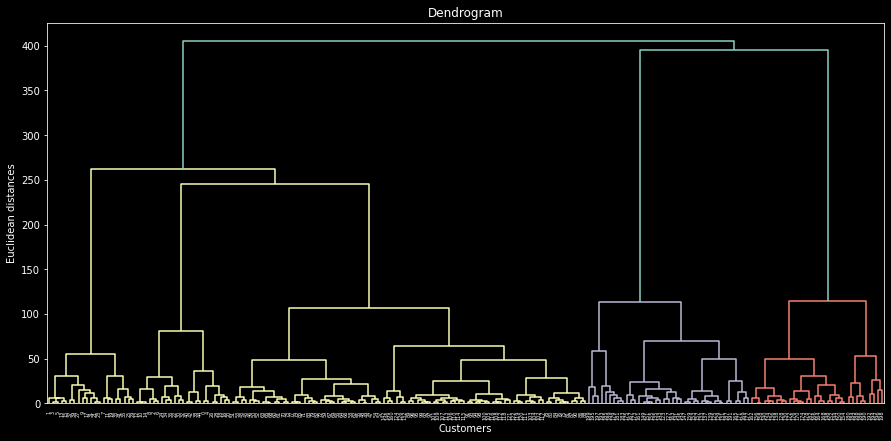

In [13]:
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.xlabel('Customers') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.show() # show the dendrogram

#### In the dendrogram we have just obtained, the longest vertical line with no extended horizontal line crosses is at the green section. The third line is between euclidian distances (110 - 250). Taking our threshold to be 150, the optimal number of clusters obtained is five.

### Agglomerative Clustering model

In [14]:
Agg_hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = Agg_hc.fit_predict(data) # model fitting on the dataset

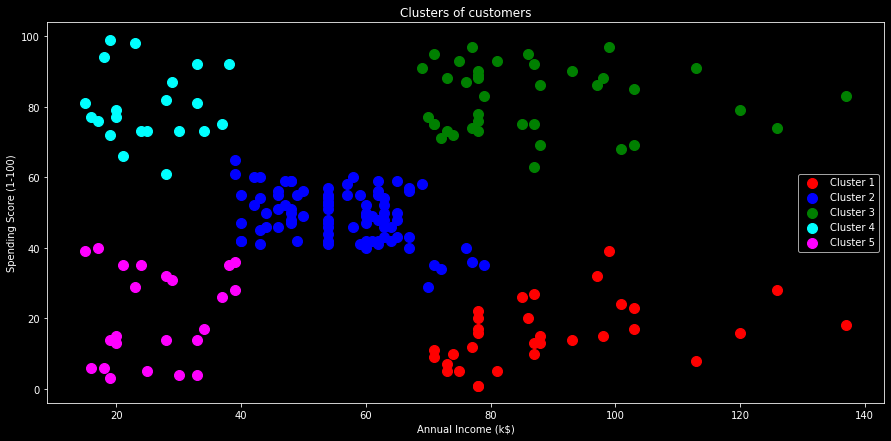

In [17]:
plt.figure(figsize=(15, 7))
# plotting cluster 1
plt.scatter(data[y_hc == 0, 0], data[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1') # plotting cluster 2
plt.scatter(data[y_hc == 1, 0], data[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') # plotting cluster 3
plt.scatter(data[y_hc == 2, 0], data[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3') # plotting cluster 4
plt.scatter(data[y_hc == 3, 0], data[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  # plotting cluster 5
plt.scatter(data[y_hc == 4, 0], data[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plot title addition
plt.title('Clusters of customers')
# labelling the x-axis
plt.xlabel('Annual Income (k$)')
# label of the y-axis
plt.ylabel('Spending Score (1-100)')
# printing the legend
plt.legend()
# show the plot
plt.show()